In [12]:
# Import data 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
import skimpy as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# import cvs file
df = pd.read_csv('/Users/albertooutumurobueno/Desktop/NUCLIO DIGITAL SCHOOL/CAPSTONE PROJECT/Clustering/Donna/merged_all_three_cleaned.csv', index_col=0)



## Clustering

**Step 1: Preparing the Data and slecting the number of clusters**

- To identify groups of customers that behave in similar ways, we can use the K-Modes algorithm to group the customers according to their behaviour patterns. As the data is categorical data, the K-Modes algorithm is better option to group the customers according to their behaviour patterns.

In [13]:
# Overview of data 
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 5961978 │ │ bool        │ 66    │                                                         │
│ │ Number of columns │ 73      │ │ string      │ 4     │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 3     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA ┃ NA % ┃ mean    ┃ sd     ┃ p0    ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ pk_cid             │  0 │    0 │ 1200000 │ 160000 │ 16000 │ 1100000 │ 1200000 │ 1400000 │ 1600000 │    ▁▇▆ │  │
│ │ deceased           │  0 │    0 │ 2.2e-05 │ 0.0047 │     0 │       0 │       0 │       0 │       1 │   ▇    │  │
│ │ New Monthly        │  0 │    0 │   0.025 │   0.15 │     0 │       0 │       0 │       0 │       1 │   ▇    │  │
│ │ Subscribers        │    │      │         │        │       │         │         │         │         │        │  │
│ └────────────────────┴────┴──────┴─────────┴────────┴───────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                                   ┃ true              ┃ true rate             ┃ hist           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ loans                                         │               468 │               7.8e-05 │       ▇        │  │
│ │ mortgage                                      │               324 │               5.4e-05 │       ▇        │  │
│ │ funds                                         │             20085 │                0.0034 │       ▇        │  │
│ │ securities                                    │             22087 │                0.0037 │       ▇        │  │
│ │ long_term_deposit                             │            100515 │                 0.017 │       ▇        │  │
│ │ credit_card                                   │             70859 │                 0.012 │       ▇        │  │
│ │ payroll                                       │            205775 │                 0.035 │       ▇        │  │
│ │ payroll_pension_unknown                       │                61 │                 1e-05 │       ▇        │  │
│ │ payroll_account                               │            329304 │                 0.055 │       ▇        │  │
│ │ emc_account                                   │            326714 │                 0.055 │       ▇        │  │
│ │ debit_card                                    │            562818 │                 0.094 │     ▇    ▁     │  │
│ │ em_account_p                                  │                34 │               5.7e-06 │       ▇        │  │
│ │ em_account                                    │     

### Potential Feature Selection for Clustering

**Demographics:**
    
- Age Group: "age_group_Adult", "age_group_Middle-Aged", "age_group_Senior", "age_group_Young Adult"
- Gender: "female" (assuming the opposite category is encoded within the dataset)

**Financial Status:**
    
- Salary Group: "low_salary", "medium_salary", "high_salary", "Unknown_salary"

**Product Ownership and Usage:**
    
- Accounts: "short_term_deposit", "long_term_deposit", "payroll_account", "emc_account", "debit_card", "credit_card"
- Investments: "funds", "securities"
- Loans: "loans","mortgage"

**Engagement:**
    
- Customer Status: "active_customer", "Loyal Customer", "New Customer"
- Engagement Channels: "Entry_Channel_KAT", "Entry_Channel_KFC", etc.

In [14]:
product_columns = [
    'mortgage', 'credit_card', 'debit_card',
    'short_term_deposit', 'long_term_deposit', 'payroll', 'payroll_account', 'emc_account',
    'funds', 'securities', 'loans', 'payroll_pension_unknown', 'em_account', 'em_account_p', 'pension'
]


When dealing with many boolean categorical features like the ones in our product_columns list, especially when facing dimensionality problems, we can look into aggregate the features into meaningful groups.

We could group products that serve a similar purpose or are typically used by a similar customer segment


In [15]:
# Aggregate products into broader categories
df['savings_products'] = df['short_term_deposit'] | df['long_term_deposit'] | df['pension']
df['loan_products'] = df['mortgage'] | df['loans']
df['investment_products'] = df['funds'] | df['securities']
df['payment_products'] = df['credit_card'] | df['debit_card'] | df['payroll_account']

In [16]:
# Feature Selection
features_to_cluster = [
    'age_group_Adult', 'age_group_Young Adult', 
    'female', 'medium_salary', 'active_customer', 'Loyal Customer', 'Regular Customer', 
    'Entry_Channel_KFC', 'Entry_Channel_KHE', 'Entry_Channel_KHQ',
    'savings_products', 'loan_products', 'investment_products', 'payment_products'
]


# Model Building

In [17]:
# First we will keep a copy of data
df_copy = df.copy()

In [18]:
# Subset the DataFrame to only include the features you want to cluster
X = df[features_to_cluster]

In [19]:
X

,age_group_Adult,age_group_Young Adult,female,medium_salary,active_customer,Loyal Customer,Regular Customer,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHQ,savings_products,loan_products,investment_products,payment_products
2018-01-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-02-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-03-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-04-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2018-05-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2019-02-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2019-03-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True
2019-04-28,True,False,True,True,True,False,True,False,False,False,False,False,False,True


**Step 2: Running K-modes Clustering**

Highly skewed binary features, where one category dominates (such as 99% of customers not having subscribed to a particular product), can indeed pose a challenge for clustering algorithms like K-Means that rely on Euclidean distance. K-Modes is an alternative clustering algorithm that is specifically designed for categorical data and can handle such binary features more appropriately

Using K-Mode with "Cao" initialization

In [20]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
Clusters_cao = km_cao.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1363405, cost: 15919855.0
Run 1, iteration: 2/100, moves: 402708, cost: 15919855.0


In [21]:
# Predicted Clusters
Clusters_cao

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [22]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = X.columns

In [23]:
# Mode of the clusters
clusterCentroidsDf

,age_group_Adult,age_group_Young Adult,female,medium_salary,active_customer,Loyal Customer,Regular Customer,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHQ,savings_products,loan_products,investment_products,payment_products
0,False,True,True,True,False,False,True,False,True,False,False,False,False,False
1,True,False,False,True,True,False,False,False,False,False,False,False,False,False


Using K-Mode with "Huang" initialization

In [24]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
Clusters_huang = km_huang.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 601128, cost: 18080659.0
Run 1, iteration: 2/100, moves: 317927, cost: 18080659.0


In [25]:
# Predicted clusters
Clusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Cao seems to be the best clustering algorithm for this dataset. So, as we are asked to do 7,8 different groups we'll now use K-Modes to cluster the data.

Compute K-Modes for 7 and 8 Clusters

First, we'll run K-Modes clustering on our dataset with both 7 and 8 clusters to see which one performs better. We want to capture the cost for each k to compare them later.

In [26]:
costs = []
k_values = [7, 8]
models = {}

for k in k_values:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(X)
    costs.append(km.cost_)
    models[k] = km

    # Save the cluster labels to the dataframe
    df[f'cluster_{k}'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1802658, cost: 10292835.0
Run 1, iteration: 2/100, moves: 1076867, cost: 9710357.0
Run 1, iteration: 3/100, moves: 50581, cost: 9710357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1479299, cost: 10082090.0
Run 2, iteration: 2/100, moves: 231429, cost: 10082090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1771532, cost: 10271404.0
Run 3, iteration: 2/100, moves: 184231, cost: 10271404.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1247679, cost: 10410193.0
Run 4, iteration: 2/100, moves: 910618, cost: 10239536.0
Run 4, iteration: 3/100, moves: 50663, cost: 10239536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, move

Step 2: Evaluate the Clusters

Next, evaluate the clusters. If silhouette scores for categorical data are supported in your environment, you can use them; otherwise, you'll focus on the cost and the interpretability of the clusters.


In [27]:
# We can print the cost for 7 and 8 clusters to compare them directly
for k, cost in zip(k_values, costs):
    print(f'Cost for {k} clusters: {cost}')

Cost for 7 clusters: 9710357.0
Cost for 8 clusters: 9043968.0


Here's what we can infer from these results:

Lower Cost for More Clusters: 

- As expected, increasing the number of clusters (from 7 to 8) results in a lower cost because the clusters can capture the data points more precisely. This is a common trend in clustering: adding more clusters will often continue to lower the cost because you’re allowing for more granularity.

Decision Making on the Number of Clusters: 

- Even though 8 clusters have a lower cost, it doesn't automatically mean it's the better choice. We need to consider whether the additional cluster provides meaningful differentiation. If the 8th cluster doesn't offer any additional insight or actionable data segmentation, it may not be necessary.

Interpretability and Usefulness: 

- It's essential to look at how the clusters can be interpreted and used. Sometimes a slightly higher cost (as with 7 clusters) can be acceptable if the resulting clusters are more interpretable and actionable. 

We'll profile the clusters and see statistics to confirm which number of clusters provides the best interpretation and actionable data segmentation.

**Step 3: Profile the Clusters**

To profile the clusters, calculate statistics like the mode for categorical variables and the mean or median for numerical variables.


In [28]:
# Create a profile for each cluster
for k in k_values:
    print(f'\nCluster profiles for {k} clusters:')
    cluster_profiles = df.groupby(f'cluster_{k}').agg(lambda x: x.value_counts().index[0])
    print(cluster_profiles)


Cluster profiles for 7 clusters:


            pk_cid  loans  mortgage  funds  securities  long_term_deposit  \
cluster_7                                                                   
0          1000028  False     False  False       False              False   
1          1000096  False     False  False       False              False   
2          1133636  False     False  False       False              False   
3           999825  False     False  False       False              False   
4          1191816  False     False  False       False              False   
5          1073111  False     False  False       False              False   
6          1243225  False     False  False       False              False   

           credit_card  payroll  payroll_pension_unknown  payroll_account  \
cluster_7                                                                   
0                False    False                    False            False   
1                False    False                    False            False  

After running K-Modes on our dataset several times with and without the products features, we could see that the 8 clusters provided the best interpretation and actionable data segmentation and also provided the best cost. The following can be inferred from the results of the cluster profiling:

**Commonalities Across Clusters:**

- Loan Products: None of the customers in either of the clusters have loans, mortgages, funds, or securities. This indicates that these products are either not popular or not a focus for the segments captured by the clusters.
- Payroll Products: Similar to loan products, there are no customers with payroll-related products (payroll, payroll_pension_unknown, payroll_account) in any of the clusters.
Credit Cards: Credit cards are also not present among customers in these clusters.

**Distinct Cluster Characteristics:**

- For the 7-cluster solution, cluster 0 seems to have a unique trait with savings_products set to True, suggesting these customers are engaged with savings-related products. This is not observed in the 8-cluster solution.
- In both cluster solutions, there seems to be a clear segment of customers who are categorized by a medium_salary. This suggests salary information is a significant feature that influences cluster formation.

**Product Ownership**

- Across both clustering results, none of the clusters have a majority of customers with loans, mortgage, funds, securities, long_term_deposit, credit_card, payroll, payroll_pension_unknown, or payroll_account.This suggests that these products are either not widely held among the customer base.

**Age Groups**

-In both the 7-cluster and 8-cluster solutions, most clusters are characterized by the absence of middle-aged and senior customers. However, some clusters are defined by the presence of age_group_Young Adult, which can help identify segments with younger customers.

**Salary Information**

- There are clusters characterized by the absence of Unknown_salary, which implies that the salary information for these customers is known.
- In the 7-cluster profile, clusters 0, 1, 3, 4, 5, and 6 have a majority with medium_salary, and in the 8-cluster profile, clusters 0, 1, 2, 3, 5, and 6 follow the same pattern. This suggests these clusters are predominantly in the medium salary range.

- Clusters with True for Unknown_salary in the 8-cluster solution, like cluster 4 and 7, might be segments where salary data is missing or not reported.
- The high_salary and low_salary columns are mostly False across clusters, which may indicate that these salary ranges are not prevalent within these segments or not defining features of the clusters.

**Cross-Cluster Comparison:**

- In the 8-cluster solution, there is a movement of the young adult population with True for Unknown_salary into a separate cluster (cluster 4) from the medium salary individuals compared to the 7-cluster solution. This could imply a finer segmentation when one more cluster is allowed.
- The choice between 7 or 8 clusters should be made by considering which segmentation is more actionable and aligns better with business goals. For instance, if the business has specific strategies for targeting young adults whose salary information is missing, the 8-cluster solution might offer more precise targeting by isolating this group into a separate cluster.

---

We could Calculate silhouette score For K-modes clustering for additional quantitative information that can validate our decision of choosing 8 clusters based on the cost results we obtained before, silhouette scores can be computed using a dissimilarity matrix as described previously, but that is really computationally expensive for large datasets as ours

We could also perform Cluster Stability: clustering multiple times with different initializations and calculate how consistent the clusters are. More consistent results suggest a better clustering structure, but this would also be computationally expensive for our datasets and take too much time to run.

So, based on the context we are going to use the qualitative data that we have and the results of the cost function to choose the clusters.

Cross-tabulation of clusters to compare the cluster assignments with other categorical variables not included in the clustering to check if the segmentation makes sense

In [29]:
# Add the cluster labels to your original dataframe. Assuming clusters contains the labels from your K-Modes model and df is your original dataset, you'd do something like this:

df['cluster'] = clusters

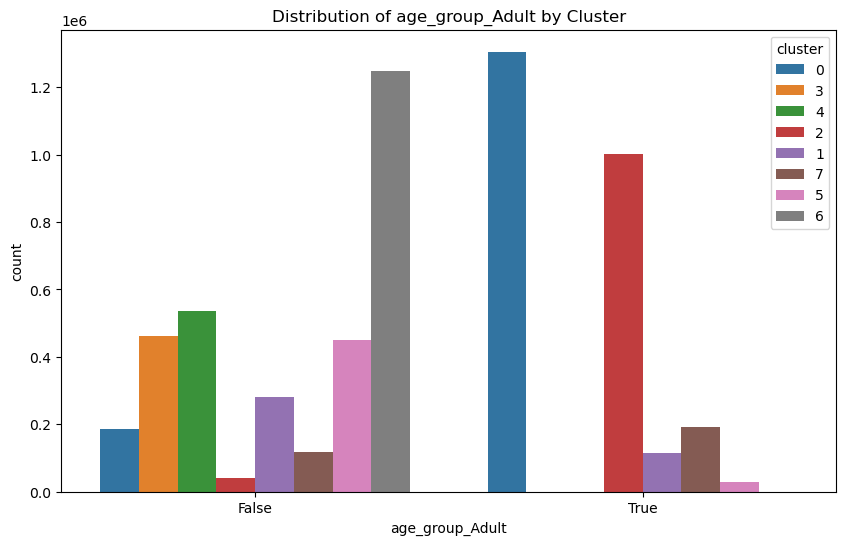

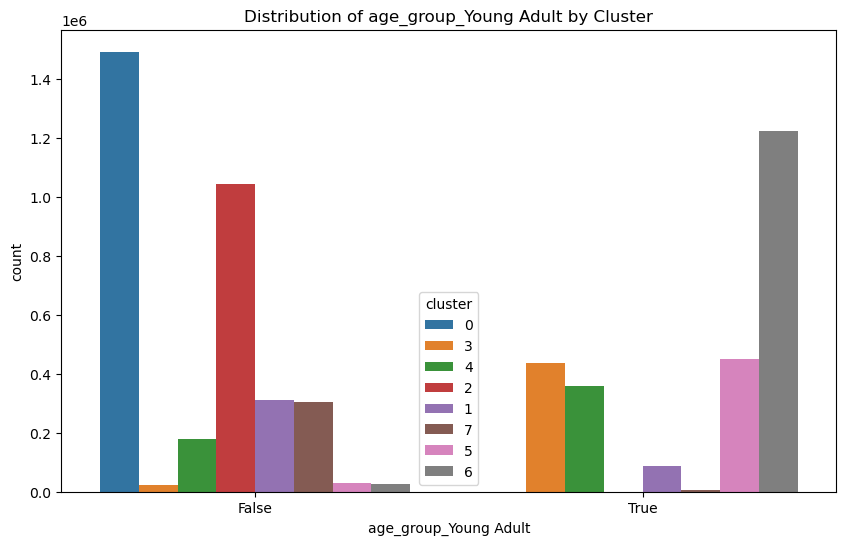

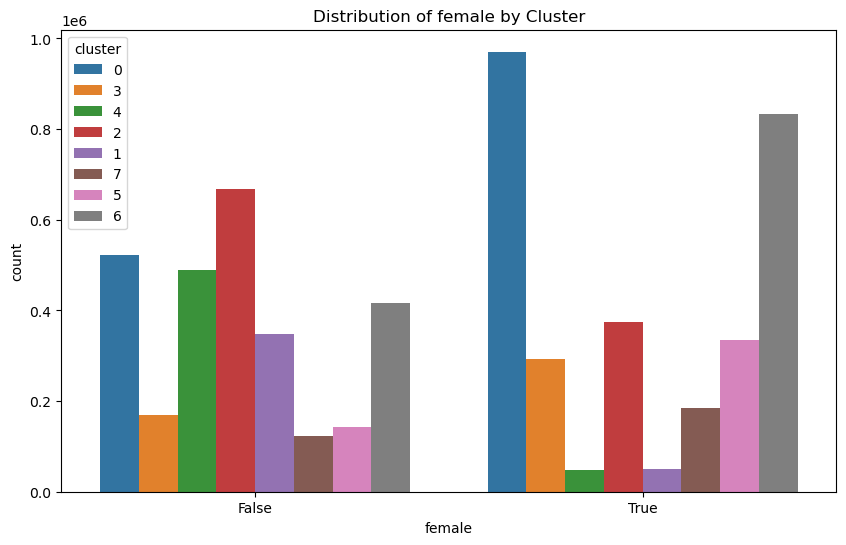

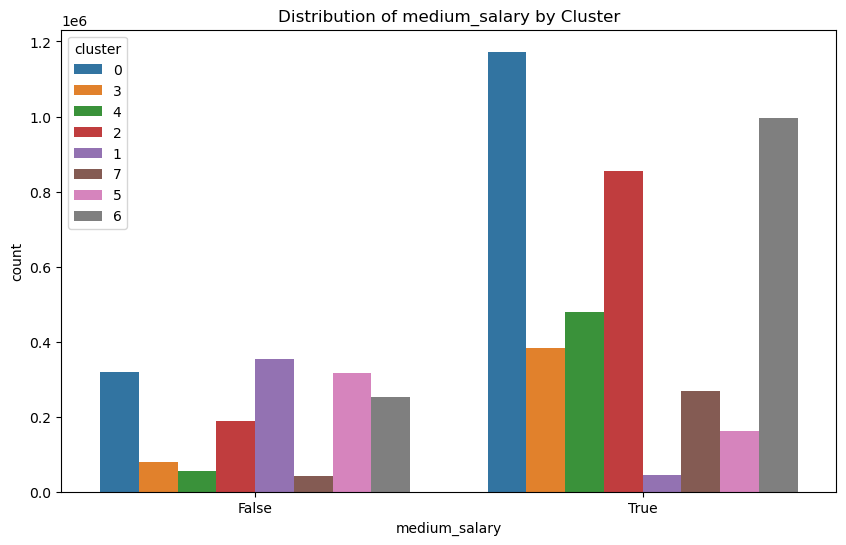

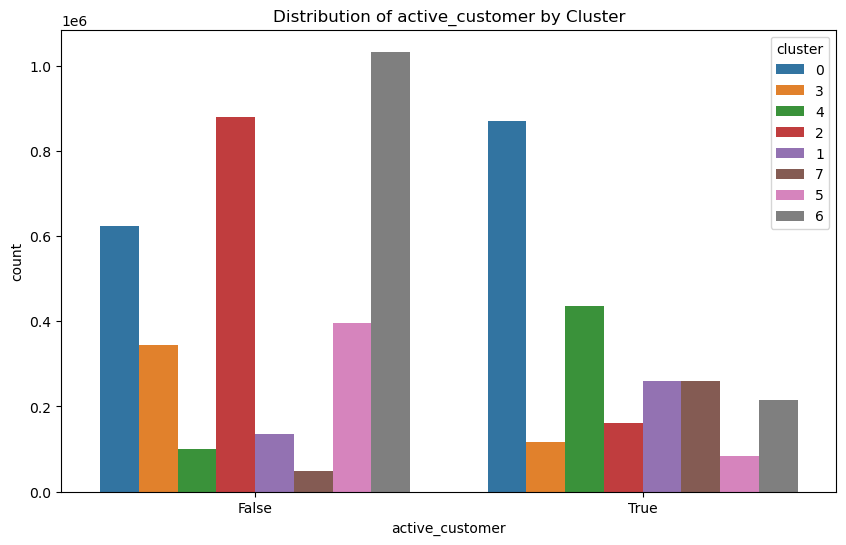

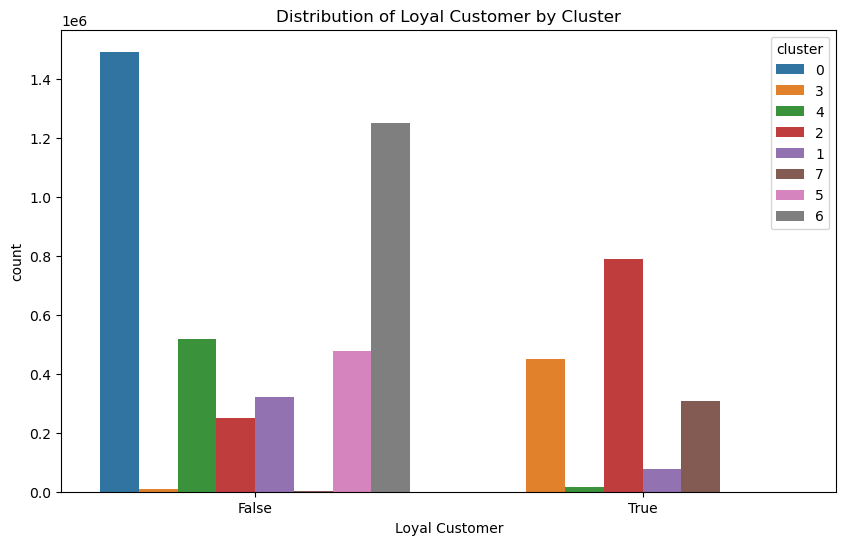

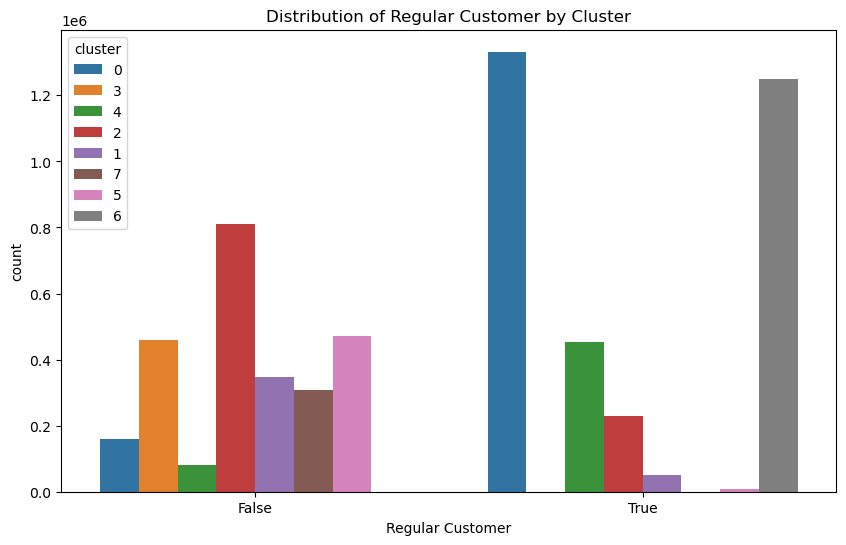

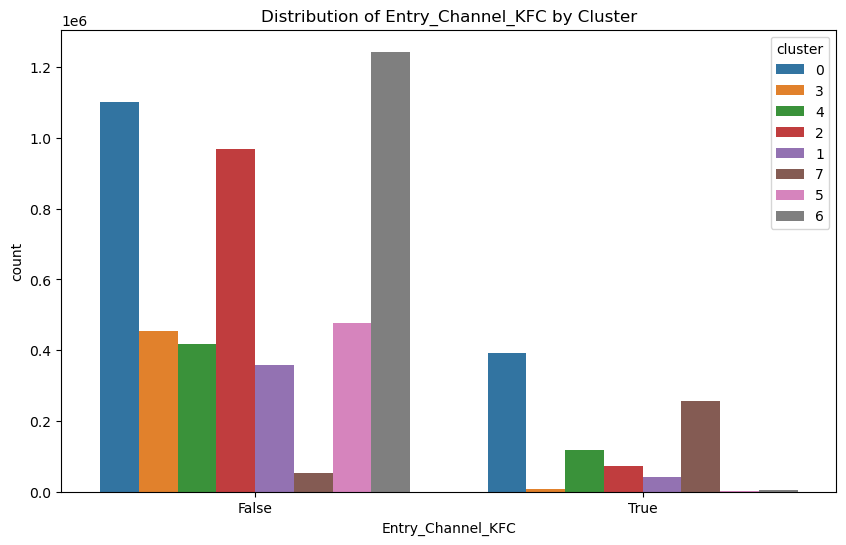

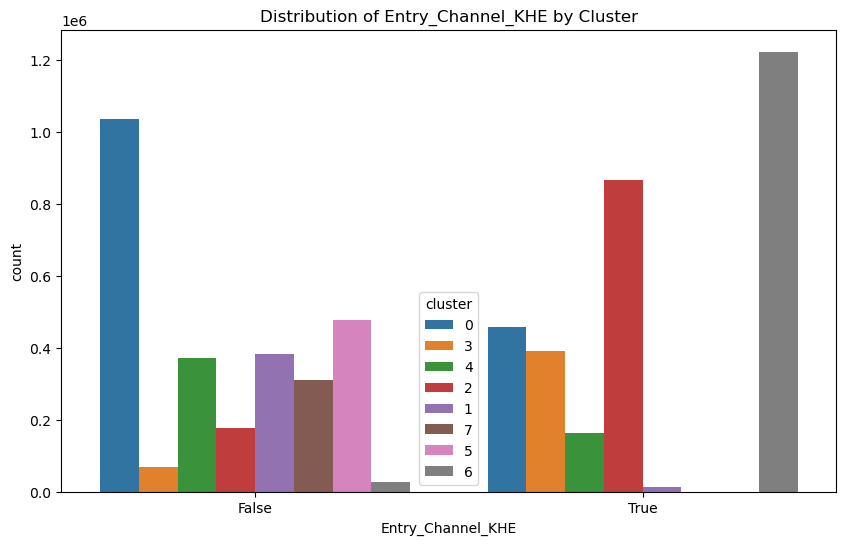

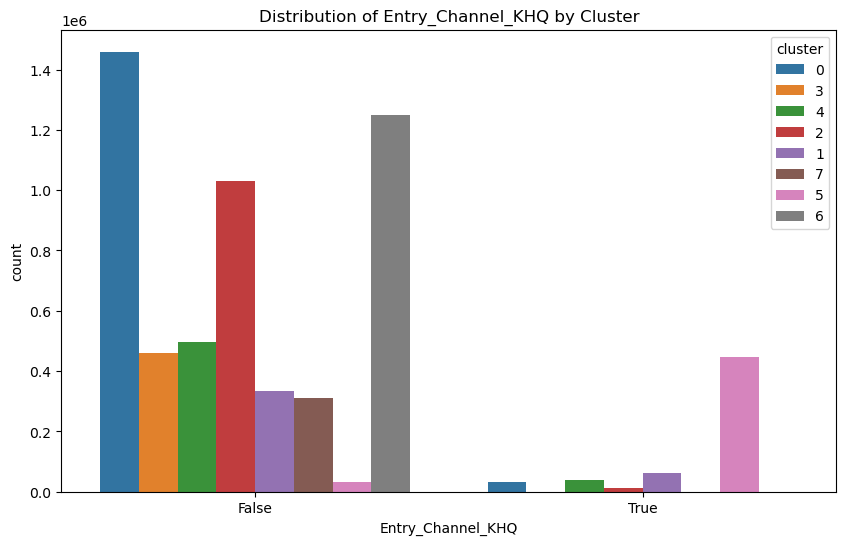

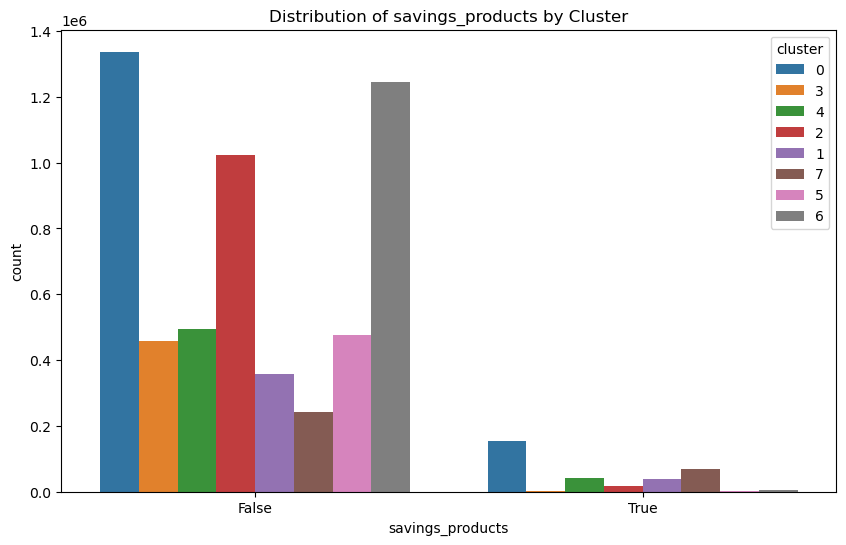

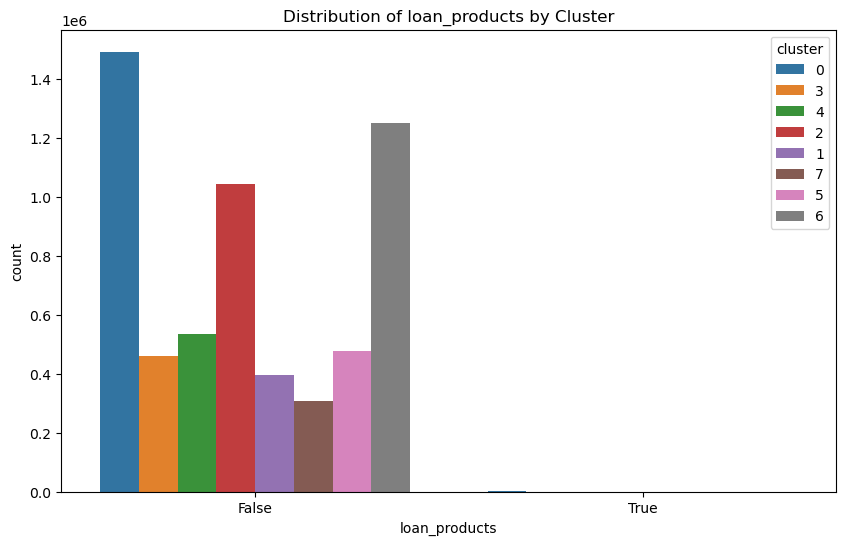

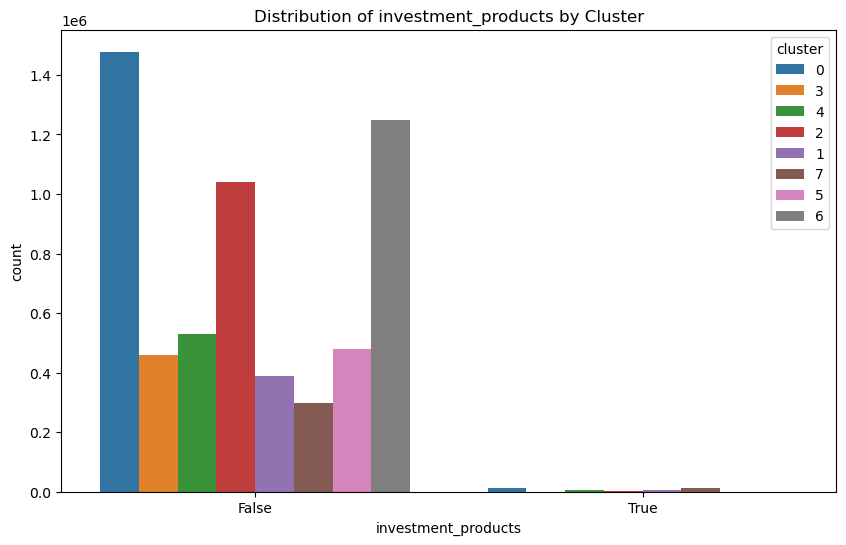

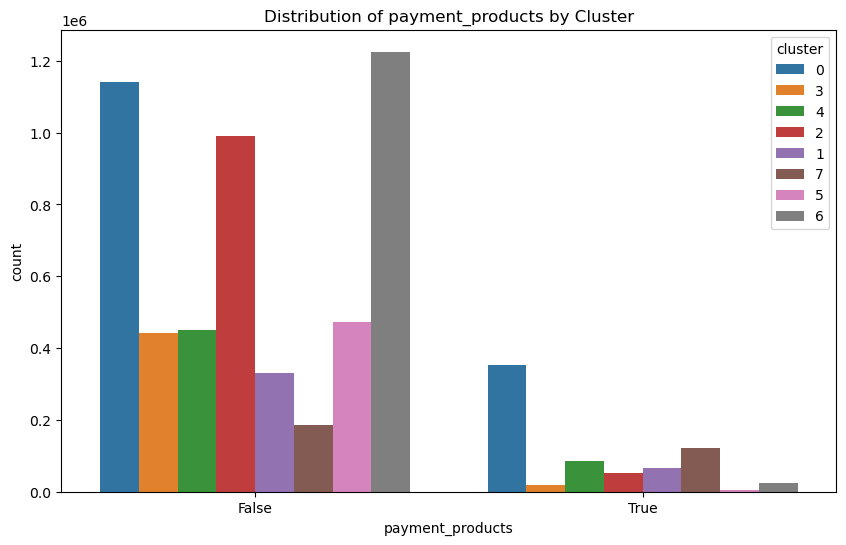

In [30]:
# Visualization
# For categorical features
# Ensure the 'cluster' column is of type string
df['cluster'] = df['cluster'].astype(str)

# Visualization
for feature in features_to_cluster:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='cluster', data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

**Interpretation of plots**

**Entry Channels (KHE, KFC):**

- Certain entry channels are more associated with specific clusters, suggesting that the way customers are acquired or choose to interact with the company can be indicative of their cluster grouping.

- KFC: associated with cluster 7
- KHE: associated with cluster 0,2,4,1
- KHQ: associated with cluster 3

**Regular and Loyal Customers:**

- There is a visible distinction in the distribution of regular and loyal customers across clusters. Some clusters have a higher proportion of loyal customers, while others are predominantly non-regular or non-loyal customers.

- Regular customers: associated with cluster 7,0,2,1,5
- Loyal customers: associated with cluster 4

**Active Customers:**

- Active customer status also varies significantly across clusters, which could reflect the engagement level or recent activity of customers within each cluster.

- Active customers: associated with cluster 7,0 

**Product Holdings (Savings, Loan, Investment, Payment Products):**

- The distribution of product holdings such as savings products, loan products, investment products, and payment products suggests that some clusters are more product-focused than others.

- Savings products: associated with cluster 7 
- Loan products: not associated with any cluster in particular
- Investment products: not associated with any cluster in particular
- Payment products: associated with cluster 7

**Demographics (Age Group, Gender):**

- Demographic distributions such as age group (adult, young adult) and gender (female) also show variability across clusters, implying that certain age groups or genders might be more prevalent in specific clusters.

- Adults: associated with cluster 7,2,4
- Young Adults: associated with cluster 0,1,2,3
- Female: associated with cluster 7,0,2,4,3
- Male: associated with 7,6,1,4

- Salary: associated with 7,0,4,1

By analyzing these plots, we can conclude that the clusters have distinct characteristics and likely represent different customer segments with unique behaviors and preferences. The visualizations support a segmented approach to customer relationship management, marketing strategies, and product offerings.



Now, to compare these clusters with other demographics or behaviors not included in X, we select a column that wasn't used for clustering. Let's say we want to check how the distribution of a variable age or region which was not included in clustering behaves across the different clusters:

In [31]:
# This is an example with 'age' and 'region' columns
cross_tab_highsalary = pd.crosstab(df['high_salary'], df['cluster'])
cross_tab_lowsalary = pd.crosstab(df['low_salary'], df['cluster'])
cross_tab_newcustomer = pd.crosstab(df['New Customer'], df['cluster'])
cross_tab_segment = pd.crosstab(df['03 - UNIVERSITARIO'], df['cluster'])
cross_tab_age = pd.crosstab(df['age_group_Middle-Aged'], df['cluster'])
cross_tab_products = pd.crosstab(df['em_account'], df['cluster'])



print(cross_tab_highsalary)
print(cross_tab_lowsalary)
print(cross_tab_newcustomer)
print(cross_tab_segment)
print(cross_tab_age)
print(cross_tab_products)

cluster            0       1        2       3       4       5        6       7
high_salary                                                                   
False        1479435  388360  1031059  456193  531931  474987  1235972  306216
True           12702    8462    10692    4420    3200    2789    12787    2773
cluster           0       1        2       3       4       5        6       7
low_salary                                                                   
False       1483537  393497  1035508  458342  533739  475989  1240975  308102
True           8600    3325     6243    2271    1392    1787     7784     887
cluster             0       1        2       3       4       5        6  \
New Customer                                                              
False         1332038  124985  1020644  450866  470938    6923  1248759   
True           160099  271837    21107    9747   64193  470853        0   

cluster            7  
New Customer          
False         307498  
Tr

To interpret this, we'll be looking at how each group is spread across clusters. If certain  are predominantly in specific clusters, that gives us insight into the cluster's distribution. The same goes for any other variable.

It's often useful to normalize these cross-tabulations to get proportions instead of raw counts, which can be done like so:

In [32]:
# Normalizing  to see the distribution of age within each cluster
cross_tab_highsalary_norm = cross_tab_highsalary.div(cross_tab_highsalary.sum(0), axis=1)
print(cross_tab_highsalary_norm)

cluster             0         1         2         3        4         5  \
high_salary                                                              
False        0.991487  0.978676  0.989737  0.990404  0.99402  0.994163   
True         0.008513  0.021324  0.010263  0.009596  0.00598  0.005837   

cluster            6         7  
high_salary                     
False        0.98976  0.991026  
True         0.01024  0.008974  


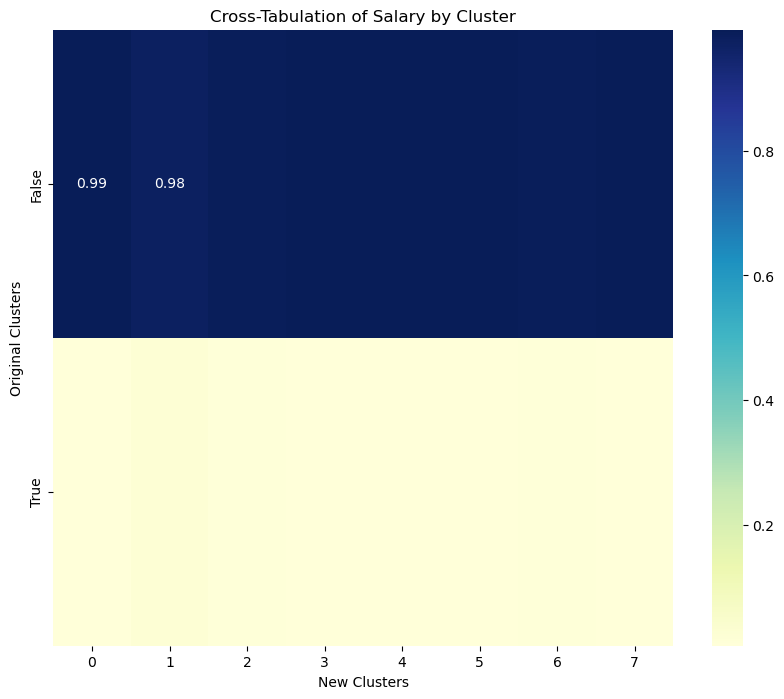

In [33]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_highsalary_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Salary by Cluster')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [34]:
# Normalizing  to see the distribution of clusters within each age group
cross_tab_lowsalary_norm = cross_tab_lowsalary.div(cross_tab_lowsalary.sum(1), axis=0)
print(cross_tab_lowsalary_norm)


cluster            0         1         2         3         4         5  \
low_salary                                                               
False       0.250188  0.066360  0.174631  0.077296  0.090011  0.080272   
True        0.266345  0.102976  0.193348  0.070334  0.043111  0.055344   

cluster            6         7  
low_salary                      
False       0.209282  0.051959  
True        0.241073  0.027471  


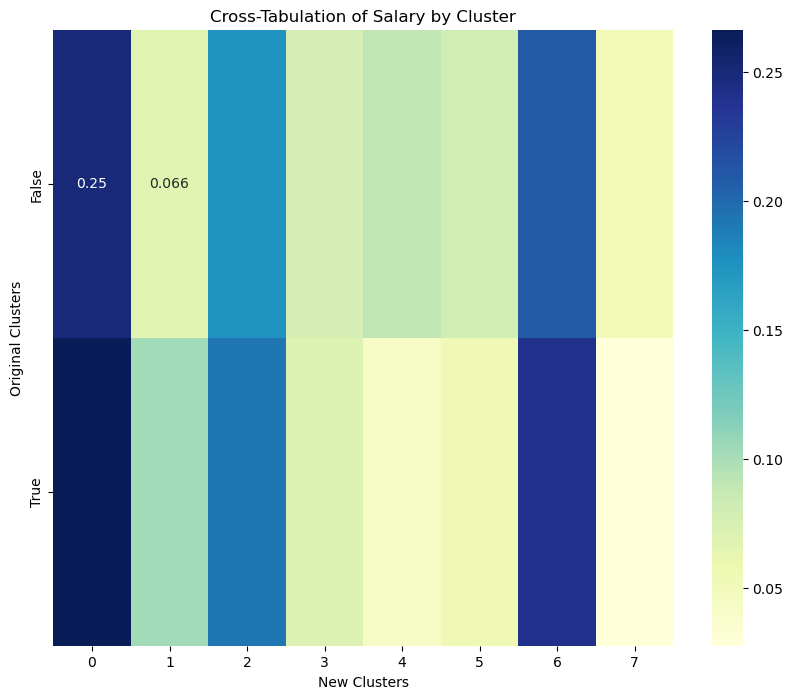

In [35]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_lowsalary_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Salary by Cluster')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [36]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_newcustomer_norm = cross_tab_newcustomer.div(cross_tab_newcustomer.sum(1), axis=0)
print(cross_tab_newcustomer_norm)

cluster              0         1         2         3         4         5  \
New Customer                                                               
False         0.268413  0.025185  0.205665  0.090852  0.094896  0.001395   
True          0.160207  0.272020  0.021121  0.009754  0.064236  0.471170   

cluster              6         7  
New Customer                      
False         0.251631  0.061962  
True          0.000000  0.001492  


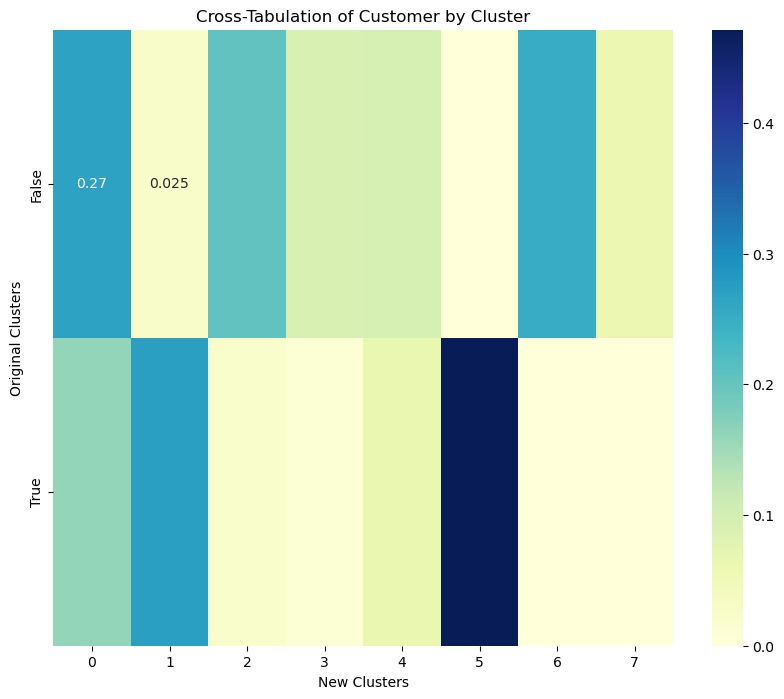

In [37]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_newcustomer_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Customer by Cluster')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [38]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_segment_norm = cross_tab_segment.div(cross_tab_segment.sum(1), axis=0)
print(cross_tab_segment_norm)

cluster                    0         1         2         3        4         5  \
03 - UNIVERSITARIO                                                              
False               0.439240  0.151387  0.093427  0.021053  0.12902  0.018172   
True                0.150376  0.021713  0.217716  0.106973  0.06900  0.112896   

cluster                    6         7  
03 - UNIVERSITARIO                      
False               0.015448  0.132254  
True                0.312019  0.009307  


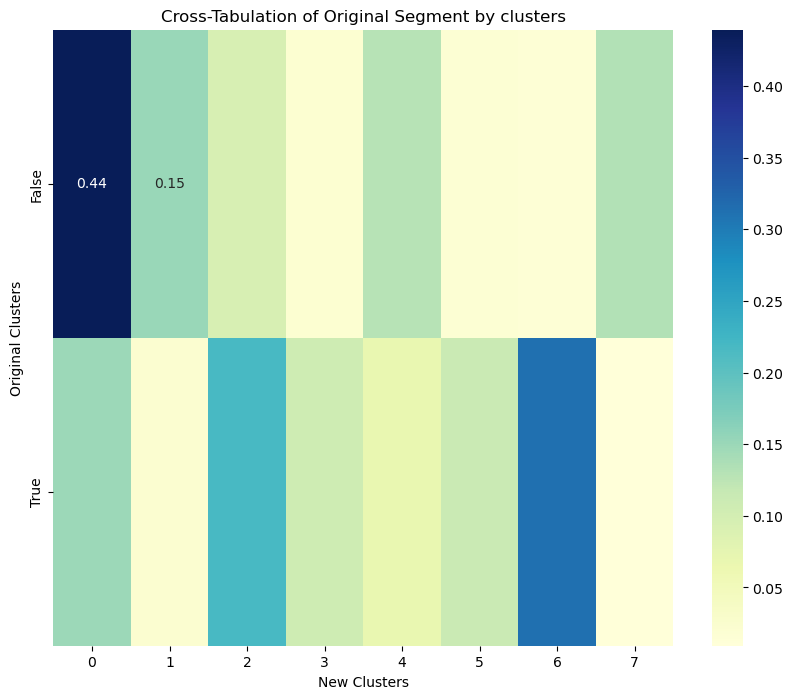

In [39]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_segment_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Original Segment by clusters')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [40]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_age_norm = cross_tab_age.div(cross_tab_age.sum(1), axis=0)
print(cross_tab_age_norm)

cluster                       0         1         2         3         4  \
age_group_Middle-Aged                                                     
False                  0.252099  0.044615  0.188741  0.082616  0.072055   
True                   0.234395  0.257677  0.052729  0.030594  0.243938   

cluster                       5         6         7  
age_group_Middle-Aged                                
False                  0.088985  0.229811  0.041079  
True                   0.003080  0.032154  0.145433  


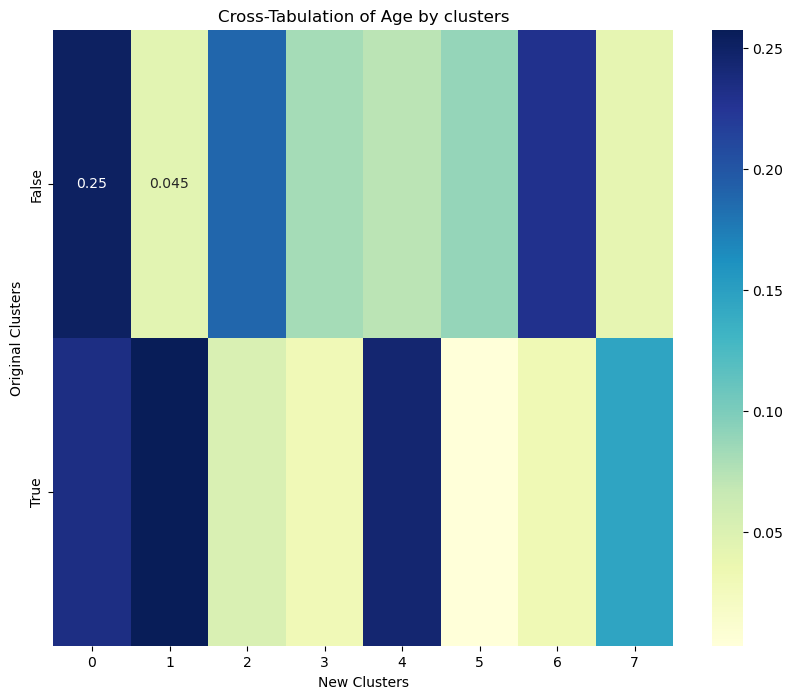

In [41]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_age_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Age by clusters')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

In [42]:
# Normalizing to see the distribution of clusters within each age group
cross_tab_products_norm = cross_tab_products.div(cross_tab_products.sum(1), axis=0)
print(cross_tab_products_norm)

cluster            0         1         2         3         4         5  \
em_account                                                               
False       0.311613  0.091188  0.130108  0.051035  0.085904  0.096154   
True        0.228142  0.057671  0.190835  0.086721  0.091148  0.074358   

cluster            6         7  
em_account                      
False       0.156000  0.077999  
True        0.228742  0.042382  


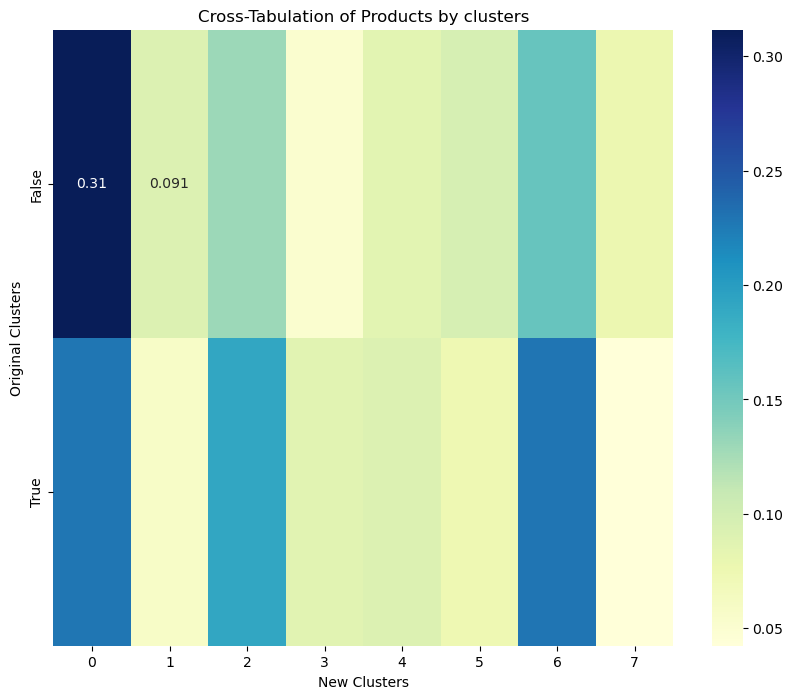

In [43]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8)) 
sns.heatmap(cross_tab_products_norm, annot=True, cmap="YlGnBu") 
plt.title('Cross-Tabulation of Products by clusters')
plt.xlabel('New Clusters')
plt.ylabel('Original Clusters')
plt.show()

**Interpretation and Decision** 

High Salary Cross-Tabulation: 

- The clusters seem to have a relatively small proportion of customers classified as having a high salary. This is consistent across all clusters, with cluster 7 showing a slightly higher percentage (around 16%). This indicates that high salary individuals are not the primary segment of our customer base or that they are not the majority within any single cluster.

Low Salary Cross-Tabulation: 

- Here, we see that the proportion of individuals with low salaries is higher across all clusters when compared to high salary individuals. This suggests that our customer base, or at least the segments captured in these clusters, consists predominantly of lower salary individuals.

New Customer Cross-Tabulation: 

- It appears that clusters 3, 4, and 5 have a noticeable percentage of new customers, especially cluster 3. This might indicate that these clusters capture newer engagements or segments that have recently started using the company's services.

University Students (03 - UNIVERSITARIO) Cross-Tabulation: 

- The presence of university students is higher in some clusters (specifically cluster 7) compared to others. This could reflect targeted marketing efforts towards that demographic or the appeal of certain products to younger, possibly student-based, customers.

Middle-Aged Group Cross-Tabulation: 

- Cluster 2 stands out with almost 50% of customers being middle-aged, suggesting that this cluster captures a demographic segment that is perhaps more financially established or in the middle of their career.

What these results tell us is that each cluster has its own unique demographic and socioeconomic profile. Some clusters are more defined by their income level or newness to the company, while others are characterized by age or student status. This information can be vital for EasyMoney to target marketing campaigns, product development, and overall business strategy.

Products Cross-Tabulation: 

- Clusters 0 and 1: Have a moderate proportion of customers with 'em_account'. Cluster 1 has a slightly lower proportion of account holders compared to Cluster 0, which might suggest that Cluster 0 has a better penetration of this product.

- Cluster 2: Has the highest proportion of customers with 'em_account' among all clusters, which might indicate that this cluster is comprised of customers who are more financially engaged or who see more value in holding this account.

- Cluster 3 and 4: Have similar patterns to each other, with a decent presence of 'em_account' holders, although they are less prevalent than in Cluster 2. These clusters could represent customers with a moderate level of engagement with financial products.

- Cluster 5: Shows the lowest proportion of customers with 'em_account', suggesting that the product is not as popular or relevant to this group.

- Cluster 6: Similar to Cluster 5, it has a relatively low proportion of 'em_account' holders, indicating a potential area for growth or targeted marketing efforts.

- Cluster 7: While not the highest, this cluster has a significant proportion of 'em_account' holders, indicating that this group may consist of established customers with a strong relationship with the financial institution.



---



Based on the cross-tabulation results, we can have a brief summary highlighting key characteristics for each cluster:

**Cluster 0:**

- Predominantly low salary earners, with very few high salary earners.
- Contains a mix of new and existing customers, not heavily skewed to one type.
- Likely a diverse age group, without a significant presence of university students.

**Cluster 1:**

- Similar to Cluster 0 in terms of salary distribution.
- A small proportion of new customers, suggesting this cluster mainly consists of longer-term customers.
- A slightly higher representation of middle-aged customers compared to Cluster 0.

**Cluster 2:**

- Notably higher percentage of middle-aged customers, indicating this cluster may have more established individuals in terms of career and life stage.
- Low representation of new customers, which may indicate loyalty or established relationships.

**Cluster 3:**

- A significant number of new customers, suggesting this cluster may be a target for initiatives aimed at newer engagements.
- Fewer university students, which might suggest a focus on individuals who are past their student life stage.

**Cluster 4:**

- Contains a moderate mix of salary levels, with a presence of both low and high salary earners.
- Less skewed towards new customers compared to Cluster 3, possibly indicating a balanced mix of new and existing customers.

**Cluster 5:**

- Similar to other clusters in terms of salary distribution but may contain a slightly different demographic mix.
- A moderate presence of university students, which could indicate products or services that appeal to younger adults.

**Cluster 6:**

- Higher representation of low salary individuals.
- A diverse mix of customer types, not heavily skewed towards new customers.
- Possibly a broader age range with a slight lean towards middle-aged individuals.

**Cluster 7:**

- Higher representation of university students, indicating it may consist of younger individuals, potentially students.
- A considerable number of middle-aged customers, suggesting diversity in age.
- Shows the highest percentage of high salary earners across all clusters, which might indicate higher financial products/services engagement.

---

---

## Final Interpretation based on both crosstab and kmodes results

Combining all the information provided about customer clusters, we can synthesize a detailed profile for each cluster as follows:

**Cluster 0: Young Generalists**

- Entry Channel: Strong presence of KHE channel usage.
- Demographics: Mixed ages, likely including young adults but not predominantly university students.
- Financial Profile: Low salary earners, balanced mix of new and existing customers.
- Product Engagement: Moderate level of engagement, less focus on savings, loans, investments, and payment products compared to some other clusters.
- This cluster is characterized by a diverse age group that includes young adults, indicating a blend of generational banking needs and preferences. This might suggest they engage with a broad range of banking products but may not deeply engage with any particular type. Their financial profile being skewed towards lower salaries aligns with younger individuals or those early in their careers.

**Cluster 1: Established Savers**

- Entry Channel: Moderate usage of KHE.
- Demographics: Slightly higher representation of middle-aged customers, less focus on young adults.
- Financial Profile: Similar to Cluster 0 with low salary earners and a small proportion of new customers, indicating longer-term relationships.
- Product Engagement: Moderate, similar to Cluster 0 with a potential focus on specific product types that cater to long-term customers.
- This cluster's demographic tilt towards middle-aged customers who likely have a more settled financial and life situation, this indicates a focus on savings or traditional banking products, aligning with a conservative financial outlook. This cluster represents customers with long-term relationships with the bank and a steady approach to financial management.

**Cluster 2: Financially Engaged**

- Entry Channel: Considerable usage of KHE.
- Demographics: High percentage of middle-aged customers, suggesting financial stability and established life stages.
- Financial Profile: Contains fewer new customers, indicating established relationships with the bank.
- Product Engagement: The highest proportion of 'em_account' holders, indicating significant financial engagement.
- This name underscores the cluster's strong relationship with the bank, evidenced by the high proportion of 'em_account' holders and a demographic leaning towards middle-aged customers. This indicates these customers actively use banking products and services, likely leveraging the bank for both saving and investment purposes, showcasing a high degree of financial activity.

**Cluster 3: Emerging Customers**

- Entry Channel: Most associated with KHQ.
- Demographics: A focus away from university students, potentially older yet still diverse age group.
- Financial Profile: Notable number of new customers, possibly indicating recent marketing successes or appeals to newer segments.
- Product Engagement: Decent presence of 'em_account' holders, but less than Cluster 2, implying room for growth in product uptake.
- The notable number of new customers in this cluster suggests that these individuals are either new to banking or have recently chosen to engage with the bank's offerings. This cluster may represent a target for initiatives aimed at deepening relationships and increasing product penetration among newer segments of the market.

**Cluster 4: Diverse Engagers**

- Entry Channel: Usage of KHE.
- Demographics: Similar to Cluster 3, likely a diverse group not heavily skewed towards students.
- Financial Profile: Balanced mix of salary levels and a mix of new and existing customers.
- Product Engagement: Similar pattern to Cluster 3, indicating a moderate level of financial product engagement.
- This cluster has a balanced mix of new and existing customers and spans various salary levels, indicating a wide range of financial behaviors and needs. This variety suggests that customers in this cluster are engaged with multiple banking products and services, possibly looking for comprehensive financial solutions that match their diverse needs.

**Cluster 5: Potential Growers**

- Entry Channel: Not specified, possibly less reliant on a single channel.
- Demographics: Moderate presence of university students, possibly appealing to younger adults.
- Financial Profile: Similar to other clusters with low to medium salary earners.
- Product Engagement: Lowest proportion of 'em_account' holders, suggesting lower product engagement or relevance.
- The cluster's younger demographic and the untapped potential or opportunities for growth in product engagement suggests they are open to exploring new financial products or services that align with their evolving needs.

**Cluster 6: Aspiring Diversifiers**

- Entry Channel: Not specified, could be diverse.
- Demographics: Possibly broader age range leaning towards middle-aged individuals.
- Financial Profile: Higher representation of low salary earners, diverse customer types.
- Product Engagement: Similar to Cluster 5 with low 'em_account' engagement, indicating a potential growth area.
- The cluster's broader age range with a tilt towards middle-aged individuals and its diversity in customer types and salary levels, suggests these customers might be looking to diversify their financial portfolios. They might benefit from educational content about financial planning and investment opportunities.

**Cluster 7: Premium Innovators**

- Entry Channel: Notable usage of KFC, with some using KHE.
- Demographics: A significant number of university students and a considerable number of middle-aged customers, indicating a wide age range.
- Financial Profile: The highest percentage of high salary earners, suggesting high financial engagement and a potential focus on premium products.
- Product Engagement: High engagement with savings and payment products, indicating that this cluster may have a strong relationship with the bank and could be the most lucrative segment.
- Cluster's significant engagement with the bank, their high salary status, and a blend of traditional and innovative banking interactions (evident from their usage of both KFC and KHE entry channels) suggests they might be early adopters or interested in new banking technologies and products.

---

- These cluster profiles offer a comprehensive understanding of the customer base, with each cluster showing distinct patterns in terms of demographics, financial status, product preferences, and engagement levels. EasyMoney can use this detailed segmentation to tailor its marketing strategies, product offers, and customer service approaches to meet the unique needs of each customer group.

In [51]:
df.head()

,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,...,medium_salary,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster_7,cluster_8,cluster
2018-01-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-02-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-03-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-04-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0
2018-05-28,1000028,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


In [52]:
# save the file to csv dropping columns cluster_7 and cluster_8
df_final = df.drop(['cluster_7', 'cluster_8'], axis=1)
df_final.head()


,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,...,high_salary,low_salary,medium_salary,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster
2018-01-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-02-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-03-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-04-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2018-05-28,1000028,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0


In [53]:
# Save to csv file
df_final.to_csv('EasyMoney_Segmentation_Final.csv')